In [1]:
%pylab inline

import torch

import tqdm
import cv2
import seaborn as sns

plt.style.use('seaborn')
rcParams['axes.grid'] = False
rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


In [22]:
# I consolidated the pre-processing and training routines, and the model arch all in one script.
import dogs
from importlib import reload
reload(dogs)

<module 'dogs' from '/Users/isaacdrachman/GitHub/ML-Projects/dogs.py'>

# Dog Breed Classification

Stanford Dogs Dataset from https://www.kaggle.com/jessicali9530/stanford-dogs-dataset

In [4]:
# Load & crop images and setup datasets.
images, trainset, testset, breeds = dogs.setup()

100%|██████████| 121/121 [01:29<00:00,  1.36it/s]
120it [00:01, 88.30it/s] 


In [41]:
# Setup model and optimizer
model = dogs.Model(len(breeds))

# Load saved state.
#model.load_state_dict(torch.load('dogs.pt'))

optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [42]:
# This function can be called successively to train further.
losses, accuracies = dogs.train_many(15, model, optimizer, trainset, testset)

[1 /15]	 train loss: 4.7023 test loss: 4.4877 train accuracy:  2.5% test accuracy:  2.0%
[2 /15]	 train loss: 4.3382 test loss: 4.2241 train accuracy:  6.4% test accuracy:  8.0%
[3 /15]	 train loss: 4.0560 test loss: 3.9992 train accuracy: 10.6% test accuracy: 18.0%
[4 /15]	 train loss: 3.7374 test loss: 4.0393 train accuracy: 16.2% test accuracy: 15.0%
[5 /15]	 train loss: 3.4546 test loss: 3.8870 train accuracy: 21.4% test accuracy: 22.0%
[6 /15]	 train loss: 3.1932 test loss: 3.7408 train accuracy: 26.8% test accuracy: 16.0%
[7 /15]	 train loss: 2.8989 test loss: 3.8453 train accuracy: 32.6% test accuracy: 19.0%
[8 /15]	 train loss: 2.6073 test loss: 3.7395 train accuracy: 38.2% test accuracy: 26.0%
[9 /15]	 train loss: 2.3781 test loss: 3.6055 train accuracy: 42.9% test accuracy: 28.0%
[10/15]	 train loss: 2.1170 test loss: 3.7938 train accuracy: 48.6% test accuracy: 29.0%
[11/15]	 train loss: 1.9072 test loss: 3.6807 train accuracy: 52.1% test accuracy: 34.0%
[12/15]	 train loss: 

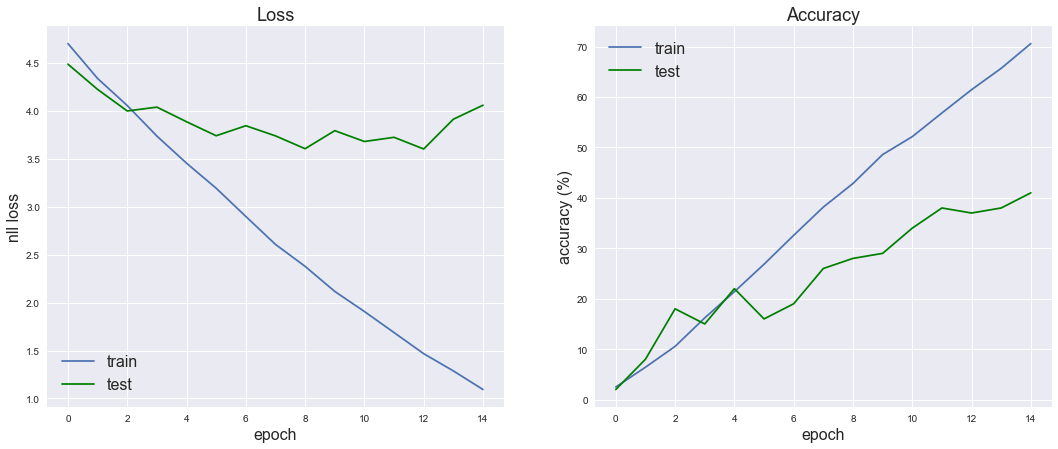

In [43]:
fig, ax = subplots(1, 2, figsize=(18,7))

ax[0].plot(losses['train'], label='train')
ax[0].plot(losses['test'], label='test', c='g')
ax[0].legend(loc='lower left', fontsize=16)
ax[0].grid(True)
ax[0].set_ylabel('nll loss', fontsize=16)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_title('Loss', fontsize=18);

ax[1].plot(100*np.array(accuracies['train']), label='train')
ax[1].plot(100*np.array(accuracies['test']), label='test', c='g')
ax[1].legend(loc='upper left', fontsize=16)
ax[1].grid(True)
ax[1].set_ylabel('accuracy (%)', fontsize=16)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_title('Accuracy', fontsize=18);

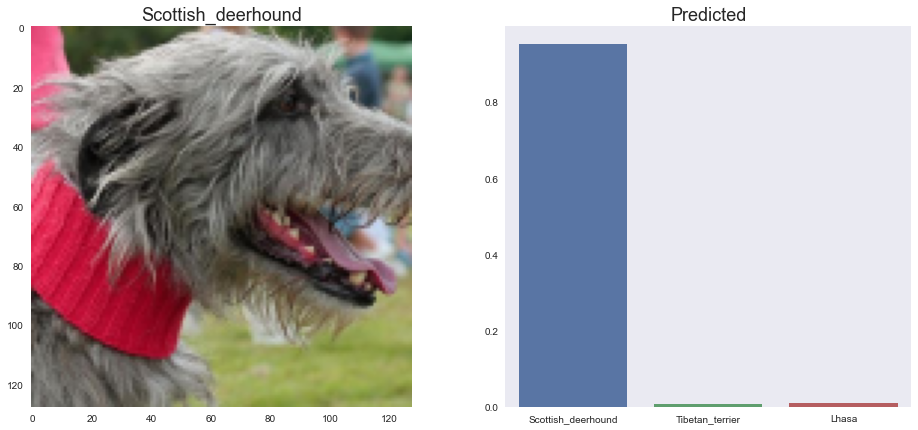

In [44]:
model.eval()

# Take image from test set and check the predicted probabilities.
fig, ax = subplots(1, 2, figsize=(16,7))

idx = 50
image, target = testset.dataset[idx]
ax[0].imshow(image.reshape(dogs.IMG_HEIGHT, dogs.IMG_WIDTH, 3)+0.5)
ax[0].set_title(breeds[target], fontsize=18);

pred = np.exp(model(image.reshape(-1,3,dogs.IMG_HEIGHT,dogs.IMG_WIDTH)).detach().numpy())[0]
cutoff = pred > np.sort(pred)[-4]
sns.barplot(x=np.array(breeds)[cutoff], y=pred[cutoff], ax=ax[1])
ax[1].set_title('Predicted', fontsize=18);

In [45]:
# Test some out-of-sample photos of my own dog who is a Maltese.
tests = []
for fname in ['mac1.jpg','mac2.jpg']:
    img = dogs.read_image(f'stanford-dogs-dataset/{fname}')
    img = cv2.resize(img, (dogs.IMG_WIDTH, dogs.IMG_HEIGHT), interpolation=cv2.INTER_AREA)
    tests.append(torch.tensor(img))

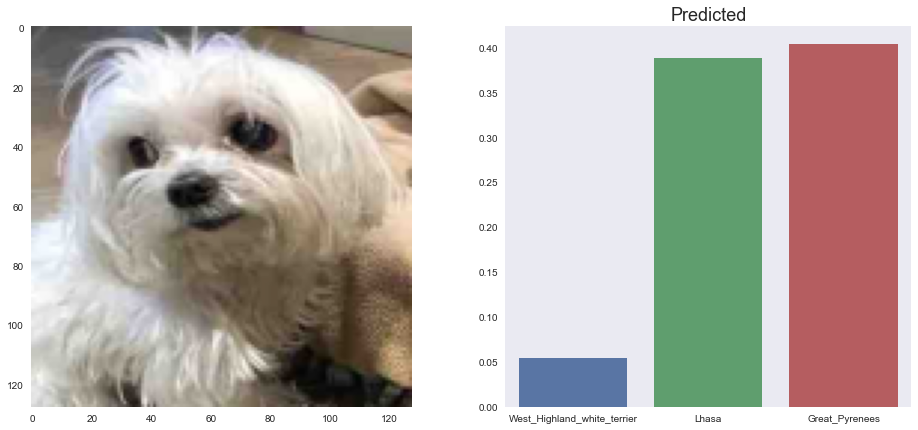

In [48]:
# Take image from test set and check the predicted probabilities.
fig, ax = subplots(1, 2, figsize=(16,7))

image = (tests[1] - 127.5)/255.0
ax[0].imshow(image.reshape(dogs.IMG_HEIGHT, dogs.IMG_WIDTH, 3)+0.5)

pred = np.exp(model(image.reshape(-1,3,dogs.IMG_HEIGHT,dogs.IMG_WIDTH)).detach().numpy())[0]
cutoff = pred > np.sort(pred)[-4]
sns.barplot(x=np.array(breeds)[cutoff], y=pred[cutoff], ax=ax[1])
ax[1].set_title('Predicted', fontsize=18);